## GReaT Example with Iris Dataset

In [1]:
# # Execute only once!
# import os
# import sys
# sys.path.append("..")
# os.chdir("..")

# os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import sys
sys.path.insert(0, "/home/qfyan/FedFetch/be_great")
# sys.path.insert(0, os.path.abspath("~/cs848-group-project/be_great"))
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("~/cs848-group-project/be_great/examples/Example_Iris.ipynb"), '..')))
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("~/cs848-group-project/be_great/examples"))))
os.environ["WANDB_DISABLED"] = "true"
sys.path


['/home/qfyan/FedFetch/be_great',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages']

In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from utils import set_logging_level


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [7]:
data = datasets.load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [ ]:
from be_great.great import GReaT
from be_great.dp import DPLLMTGen


# great = GReaT("meta-llama/Llama-2-7b-chat-hf",  # Name of the large language model used (see HuggingFace for more options)
#               epochs=20,                   # Number of epochs to train
#             #   save_steps=2000,               # Save model weights every x steps
#               logging_steps=20,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_great", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               learning_rate=4e-5,            # Set the inital learning rate
#               efficient_finetuning="lora",
#              )

# great = DPLLMTGen(
#     "gpt2",
#     # epochs=1000,
#     # save_steps=2000,
#     logging_steps=50,
#     experiment_dir="trainer_iris_dpllmtgen_test",
#     batch_size=16,                 # Batch Size
#     # lr_scheduler_type="constant", # Specify the learning rate scheduler 
#     stage1_epochs = 75,
#     stage2_epochs = 600,
#     stage1_lr =1e-4,
#     stage2_lr=1e-5,
#     loss_alpha=0.65,
#     loss_beta=0.1,
#     loss_lmbda=1.0,
#     per_sample_max_grad_norm=3., 
#     target_epsilon=10., 
#     # efficient_finetuning="lora"
# )

great = DPLLMTGen(
    "meta-llama/Llama-2-7b-chat-hf",
    # epochs=1000,
    # save_steps=2000,
    logging_steps=20,
    experiment_dir="trainer_iris_dpllmtgen_test",
    batch_size=16,                 # Batch Size
    # lr_scheduler_type="constant", # Specify the learning rate scheduler 
    stage1_epochs = 10,
    stage2_epochs = 20,
    stage1_lr =1e-5,
    stage2_lr=1e-5,
    loss_alpha=0.65,
    loss_beta=0.1,
    loss_lmbda=1.0,
    per_sample_max_grad_norm=1., 
    target_epsilon=10., 
    efficient_finetuning="lora",
    use_dp=False
)

# from be_great.dp_basic import DPBasic
# great = DPBasic("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=1,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=100,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_iris_basic_dp_test", # Name of the directory where all intermediate steps are saved
#               batch_size=8,                 # Batch Size
#               per_sample_max_grad_norm=1.0,
#               target_epsilon=3.0,
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=4e-5            # Set the inital learning rate
#               #efficient_finetuning="lora",
#               save_safetensors=False
#              )

/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-30 20:52:29,221 - INFO - PyTorch version 2.5.1+cu121 available. (config.py:54)
`low_cpu_mem_usage` was None, now default to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]
/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/peft/utils/other.py:145: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


trainable params: 39,976,960 || all params: 6,778,392,576 || trainable%: 0.589770503135875


### Start Training

In [10]:
trainer = great.fit(data)

2024-11-30 20:52:32,449 - INFO - Convert data into HuggingFace dataset object... (dp.py:91)
2024-11-30 20:52:32,453 - INFO - Create GReaT Trainer... (dp.py:96)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/home/qfyan/FedFetch/be_great/be_great/dp/dp.py:104: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `GReaTTrainer.__init__`. Use `processing_class` instead.
  great_trainer = GReaTTrainer(
2024-11-30 20:52:32,468 - INFO - Start format learning... (dp.py:113)
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/home/qfyan/FedFetch/ENV/lib/py

Step,Training Loss
20,1.807600
40,1.159800
60,0.898600
80,0.795000
100,0.745600


2024-11-30 20:53:32,549 - INFO - Convert data into HuggingFace dataset object... (dp.py:120)
2024-11-30 20:53:32,554 - INFO - Create GReaT Trainer... (dp.py:125)
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/home/qfyan/FedFetch/be_great/be_great/dp/no_dp_trainer.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `DPLLMTGenTrainerNoDP.__init__`. Use `processing_class` instead.
  super().__init__(**kwargs)
Trainer.tokenizer is now deprecated. You should use `Trainer.processing_class = processing_class` instead.
/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, bu

Step,Training Loss
20,0.469100
40,0.415600
60,0.395400
80,0.384800
100,0.379000
120,0.371600
140,0.365100
160,0.363500
180,0.361400
200,0.362700


In [11]:
loss_hist = trainer.state.log_history.copy()
loss_hist

[{'loss': 0.4338,
  'grad_norm': 2.465620994567871,
  'learning_rate': 9e-06,
  'epoch': 2.0,
  'step': 20},
 {'loss': 0.4022,
  'grad_norm': 1.8822344541549683,
  'learning_rate': 8.000000000000001e-06,
  'epoch': 4.0,
  'step': 40},
 {'loss': 0.3892,
  'grad_norm': 1.7927281856536865,
  'learning_rate': 7e-06,
  'epoch': 6.0,
  'step': 60},
 {'loss': 0.3796,
  'grad_norm': 1.5968645811080933,
  'learning_rate': 6e-06,
  'epoch': 8.0,
  'step': 80},
 {'loss': 0.3748,
  'grad_norm': 1.6843212842941284,
  'learning_rate': 5e-06,
  'epoch': 10.0,
  'step': 100},
 {'loss': 0.3691,
  'grad_norm': 1.6386854648590088,
  'learning_rate': 4.000000000000001e-06,
  'epoch': 12.0,
  'step': 120},
 {'loss': 0.3623,
  'grad_norm': 1.82204008102417,
  'learning_rate': 3e-06,
  'epoch': 14.0,
  'step': 140},
 {'loss': 0.3625,
  'grad_norm': 2.5888991355895996,
  'learning_rate': 2.0000000000000003e-06,
  'epoch': 16.0,
  'step': 160},
 {'loss': 0.3599,
  'grad_norm': 1.86910879611969,
  'learning_rat

In [12]:
loss = [x["loss"] for x in loss_hist[:-1]]
epochs = [x["epoch"] for x in loss_hist[:-1]]

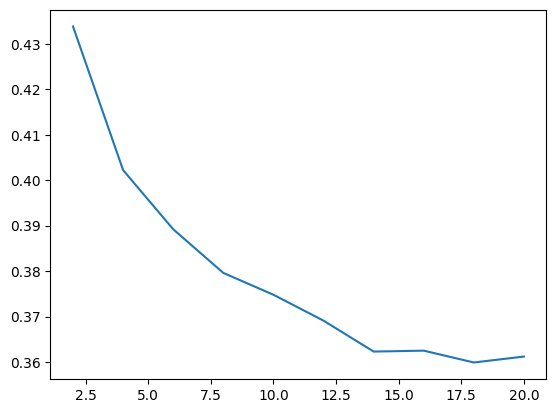

In [13]:
plt.plot(epochs, loss)

### Save Model

In [ ]:
great.save("iris_dpllmtgen_test")

### Load Model

In [ ]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [11]:
n_samples = 150

In [12]:
samples = great.sample(n_samples, k=50, device="cuda")

  0%|          | 0/150 [00:00<?, ?it/s]

/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/home/qfyan/FedFetch/ENV/lib/python3.10/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
 29%|██▊       | 43/150 [00:46<01:54,  1

In [13]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,5.0,3.6,0.5,0.0,0.0
1,5.0,3.0,1.8,0.8,0.0
2,5.3,2.8,3.3,1.2,0.0
3,6.1,2.7,4.3,1.5,2.0
4,6.3,2.6,4.6,1.8,1.0


In [18]:
samples.to_csv("iris_dpllmtgen_test.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [ ]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

In [ ]:
samples_custom.head()

## Plot Data

Original Data

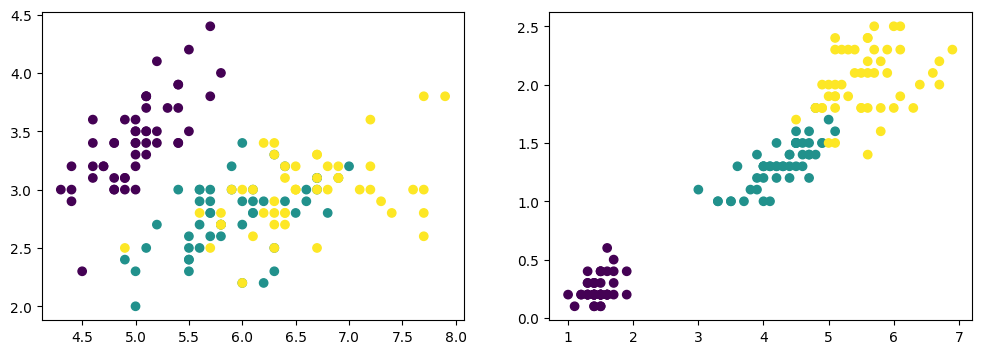

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [ ]:
samples = pd.read_csv("iris_dpllmtgen_test.csv")

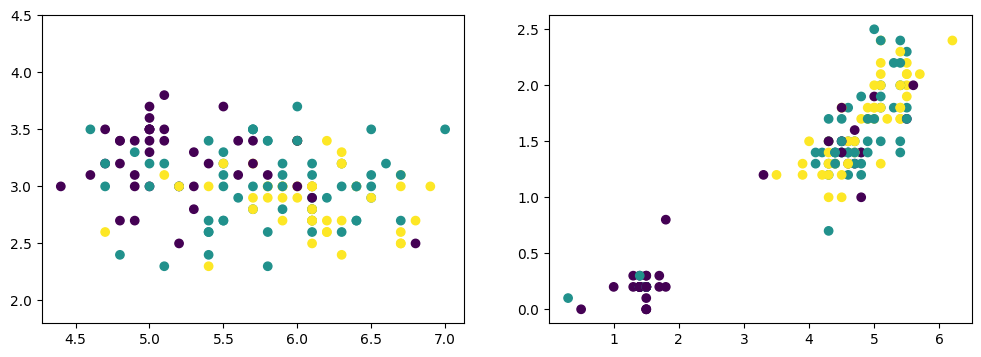

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"], samples["sepal width"], c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"], samples["petal width"], c=samples["target"].astype("int"))